 # Final Project

## Problem Definition

Predict whether an individual's annual income is above or below 50,000$ based on the following provided features.

## General Feature Description

* **workclass**: Form of employment
* **education**: The highest level of education
* **marital**: Marital status
* **occupation**: Occupation
* **relationship**: The relationshop of each individual in the home
* **race**
* **sex**
* **country**: Country of origin
* **age**
* **education num**: Education level
* **fnlwgt**: Final weight (Weights of individuals assigned by the Census     Bureau based on a series of observations)					
* **capital gain**: Individual capital gain
* **capital loss**: Individual capital loss
* **hours per week**: Working hours per week
* **income** (target variable): An individual's annual income (<=50K, >50K)

## Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve, roc_curve
sns.set(style='whitegrid', context='talk')

## Data Munging

In [2]:
df = pd.read_csv('classification_project.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,90.0,?,77053.0,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,<=50K
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66.0,?,186061.0,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,<=50K
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,<=50K
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,<=50K


We can see that some values in "workclass" and "occupation are "?". We will check it for other variables also and change
no NaN.

In [4]:
df.tail()

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
33267,77.0,?,174887.0,Some-college,10.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,6.0,United-States,<=50K
33268,77.0,Private,149912.0,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,10.0,United-States,<=50K
33269,77.0,Private,83601.0,Prof-school,15.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
33270,77.0,Private,123959.0,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,White,Female,0.0,0.0,32.0,United-States,<=50K
33271,77.0,Private,154205.0,HS-grad,9.0,Widowed,Adm-clerical,Not-in-family,White,NaN,0.0,0.0,10.0,United-States,<=50K


In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education num', 'marital',
       'occupation', 'relationship', 'race', 'sex', 'capital gain',
       'capital loss', 'hours per week', 'country', 'income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33272 entries, 0 to 33271
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32956 non-null  float64
 1   workclass       32928 non-null  object 
 2   fnlwgt          32941 non-null  float64
 3   education       32919 non-null  object 
 4   education num   32949 non-null  float64
 5   marital         32947 non-null  object 
 6   occupation      32955 non-null  object 
 7   relationship    32966 non-null  object 
 8   race            32942 non-null  object 
 9   sex             32994 non-null  object 
 10  capital gain    32930 non-null  float64
 11  capital loss    32950 non-null  float64
 12  hours per week  32947 non-null  float64
 13  country         32925 non-null  object 
 14  income          33272 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.8+ MB


In [7]:
df.isin(['?']).sum()

age                  0
workclass         1995
fnlwgt               0
education            0
education num        0
marital              0
occupation        2014
relationship         0
race                 0
sex                  0
capital gain         0
capital loss         0
hours per week       0
country            591
income               0
dtype: int64

In [8]:
df = df.replace('?', np.nan)

In [9]:
df.isnull().sum()

age                316
workclass         2339
fnlwgt             331
education          353
education num      323
marital            325
occupation        2331
relationship       306
race               330
sex                278
capital gain       342
capital loss       322
hours per week     325
country            938
income               0
dtype: int64

In [10]:
df.shape

(33272, 15)

In [11]:
numeric_statistics = df.describe() # statistcs related to numeric variables
numeric_statistics

,age,fnlwgt,education num,capital gain,capital loss,hours per week
count,32956.000000,3.294100e+04,32949.000000,32930.000000,32950.000000,32947.000000
mean,39.205729,1.893608e+05,10.063158,1088.362041,88.190774,40.236015
std,14.157151,1.050798e+05,2.593566,7415.013387,407.304617,12.499891
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.780740e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.365860e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
cat_features = ['workclass', 'marital', 'occupation', 'relationship', 'education',
               'race','sex', 'country']
num_features = ['age','fnlwgt','education num','capital gain','capital loss',
               'hours per week']

In [13]:
for cat in cat_features:
    print(f'[INFO] Feature: {cat}')
    print(df[cat].value_counts())
    print('\n')

[INFO] Feature: workclass
Private             22767
Self-emp-not-inc     2594
Local-gov            2123
State-gov            1305
Self-emp-inc         1163
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


[INFO] Feature: marital
Married-civ-spouse       15242
Never-married            10620
Divorced                  4451
Widowed                   1161
Separated                 1029
Married-spouse-absent      421
Married-AF-spouse           23
Name: marital, dtype: int64


[INFO] Feature: occupation
Prof-specialty       4167
Exec-managerial      4119
Craft-repair         4086
Adm-clerical         3782
Sales                3714
Other-service        3316
Machine-op-inspct    2003
Transport-moving     1601
Handlers-cleaners    1374
Farming-fishing      1016
Tech-support          925
Protective-serv       653
Priv-house-serv       176
Armed-Forces            9
Name: occupation, dtype: int64


[INFO] Feature: relationship
Husband   

In [14]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

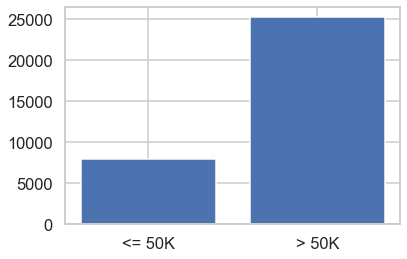

In [15]:
plt.bar(['<= 50K', '> 50K'], df['income'].value_counts(ascending=True))
plt.show()

In [16]:
income_class_dist = df.income.value_counts() / len(df)
income_class_dist # we can see that class are inbalanced

<=50K    0.759678
>50K     0.240322
Name: income, dtype: float64

In [17]:
#transform the income variable into a binary (0 vs 1) variable
df.loc[df['income'] == '<=50K', 'income'] = 0
df.loc[df['income'] == '>50K','income'] = 1

In [18]:
df.head(10)

,age,workclass,fnlwgt,education,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
0,90.0,NaN,77053.0,HS-grad,9.0,Widowed,NaN,Not-in-family,White,Female,0.0,4356.0,40.0,United-States,0
1,82.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,0
2,66.0,NaN,186061.0,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,0.0,4356.0,40.0,United-States,0
3,54.0,Private,140359.0,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0.0,3900.0,40.0,United-States,0
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0.0,3900.0,40.0,United-States,0
5,34.0,Private,216864.0,HS-grad,9.0,Divorced,Other-service,Unmarried,White,Female,0.0,3770.0,45.0,United-States,0
6,38.0,Private,150601.0,10th,6.0,Separated,Adm-clerical,Unmarried,White,Male,0.0,3770.0,40.0,United-States,0
7,74.0,State-gov,88638.0,Doctorate,16.0,Never-married,Prof-specialty,Other-relative,White,Female,0.0,3683.0,20.0,United-States,1
8,68.0,Federal-gov,422013.0,HS-grad,9.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,3683.0,40.0,United-States,0
9,41.0,Private,70037.0,Some-college,10.0,Never-married,Craft-repair,Unmarried,White,Male,0.0,3004.0,NaN,NaN,1


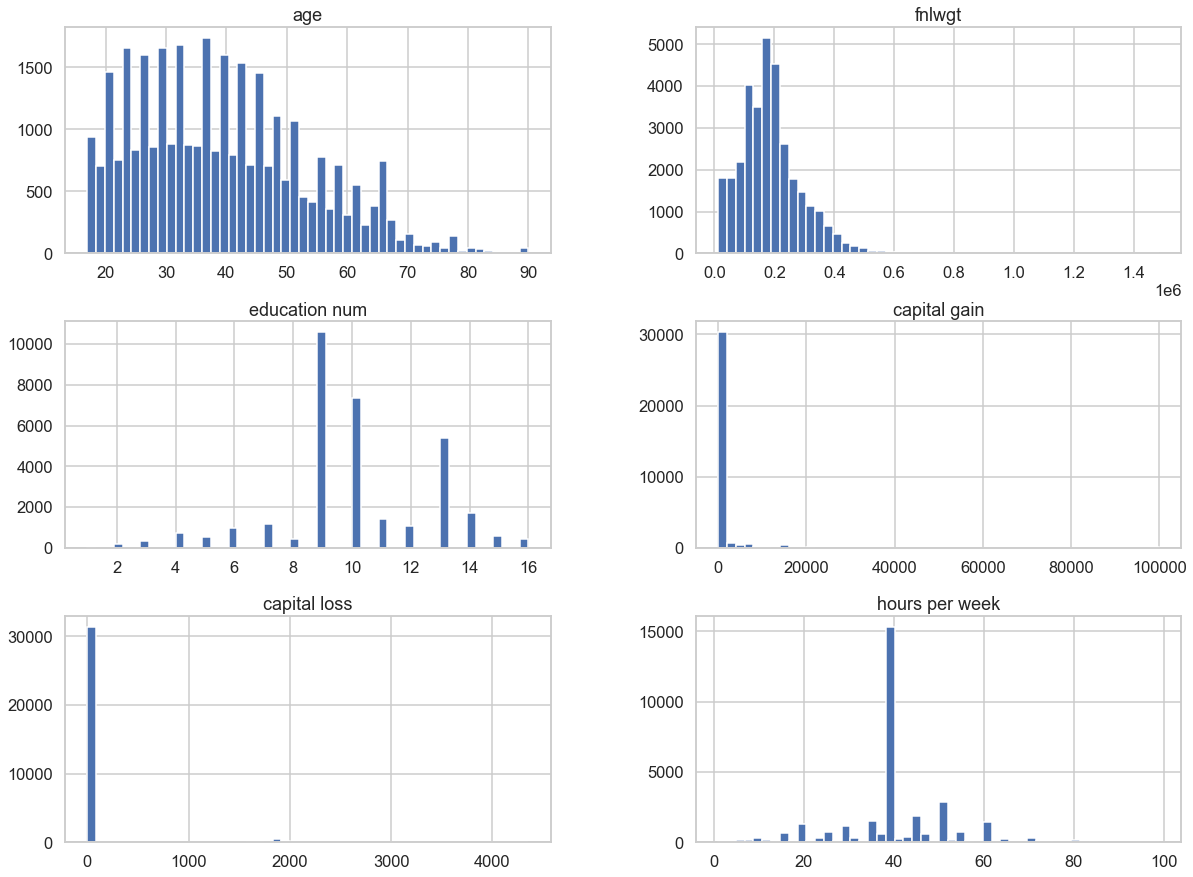

In [19]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

We can see that the variables such as **capital loss** and **capital gain** have some significant outliers. We will remove them.

In [20]:
df.shape

(33272, 15)

In [21]:
df = df[df['capital gain'] <= 15000]
df = df[df['capital loss'] <= 1000]

In [22]:
df.shape

(30486, 15)

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

### Split training and test data

In [24]:
training_set, test_set = train_test_split(df, test_size = 0.25, random_state = 0, stratify = df[['income']])

In [25]:
TR_LENGTH = len(training_set)
TE_LENGTH = len(test_set)

print(f'Training samples: {TR_LENGTH}, Test samples: {TE_LENGTH}')

Training samples: 22864, Test samples: 7622


In [26]:
# count the number of targets in training_set
training_set['income'].value_counts()

0    18027
1     4837
Name: income, dtype: int64

In [27]:
# count the number of targets in test_set
test_set['income'].value_counts()

0    6010
1    1612
Name: income, dtype: int64

## Exploratory Data Analysis (EDA)

In [28]:
# copy data for preventing damage in raw training data
data = training_set.copy()

In [29]:
def build_graph(data, feature, title_add, xlabel = "", rotation_degree = 90):
    pd.crosstab(data[feature], data['income']).plot(kind="bar", figsize=(15,6))
    plt.title(f"Income Level Frequency {title_add}")
    plt.xlabel(xlabel)
    plt.xticks(rotation = rotation_degree)
    plt.legend(["<= 50K","> 50K"])
    plt.show()

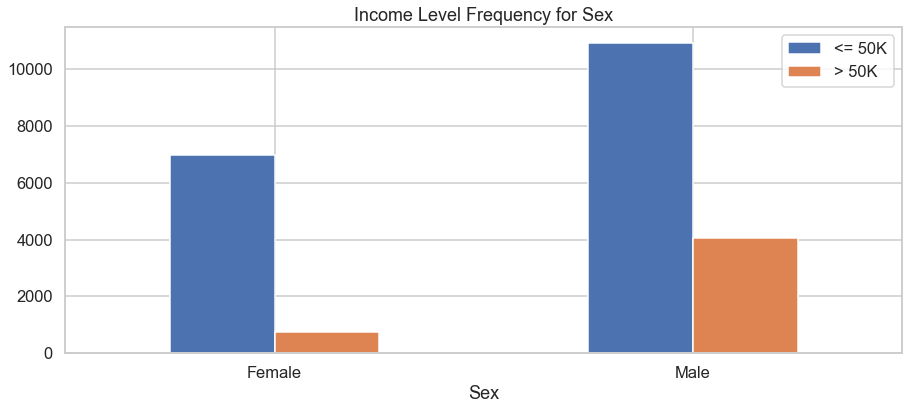

In [30]:
build_graph(data, feature = 'sex', title_add = "for Sex", xlabel = 'Sex', rotation_degree = 0)

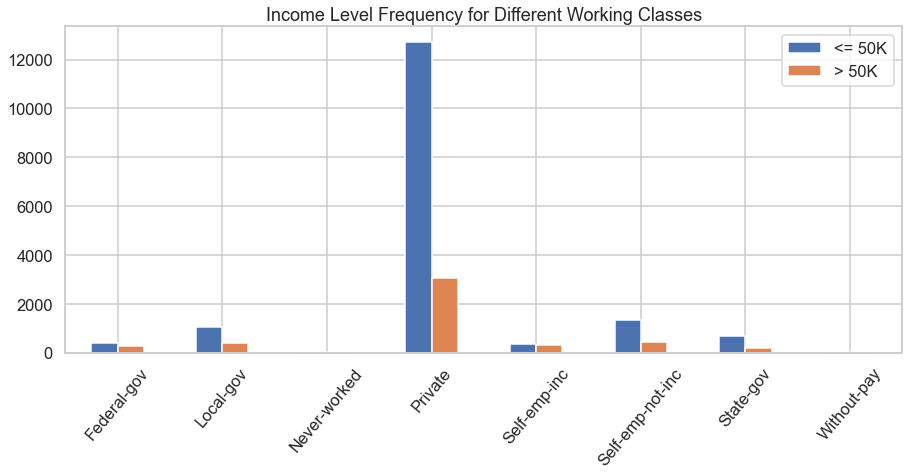

In [31]:
build_graph(data, feature = 'workclass', title_add = "for Different Working Classes", rotation_degree = 50)

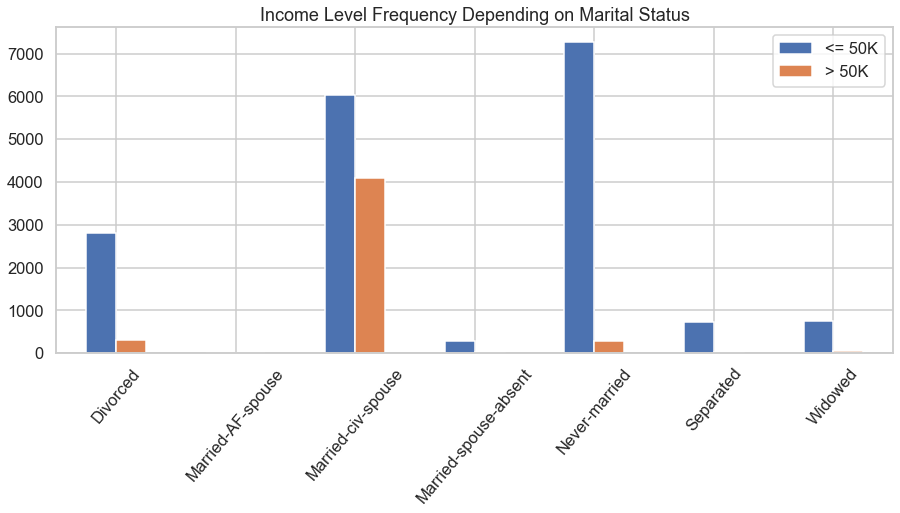

In [32]:
build_graph(data, feature = 'marital', title_add = "Depending on Marital Status", rotation_degree = 50)

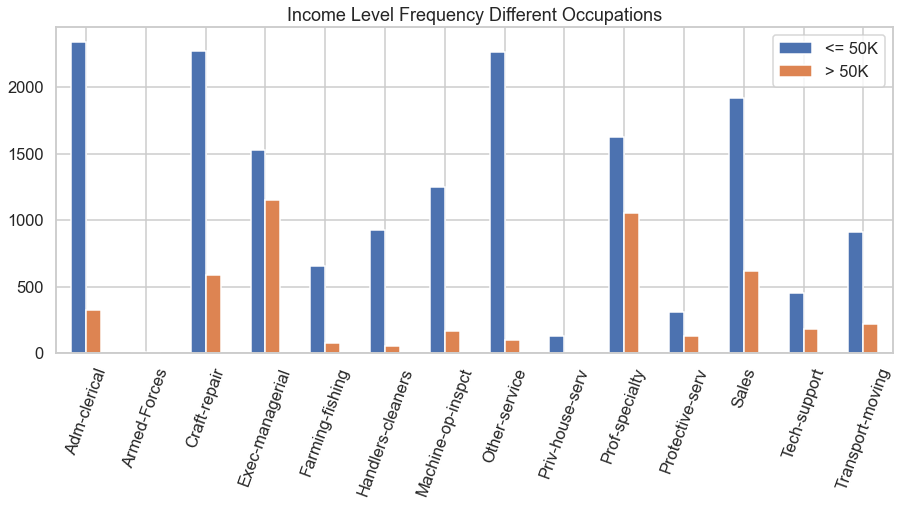

In [33]:
build_graph(data, feature = 'occupation', title_add = "Different Occupations", rotation_degree = 70)

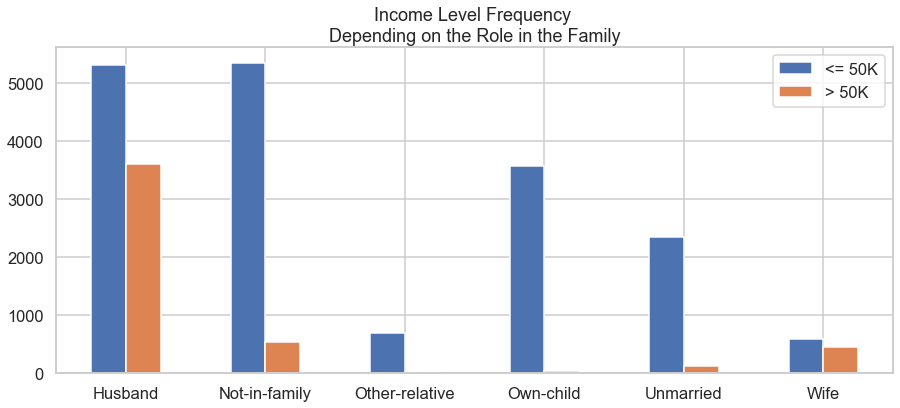

In [34]:
build_graph(data, feature = 'relationship', title_add = "\nDepending on the Role in the Family", rotation_degree = 0)

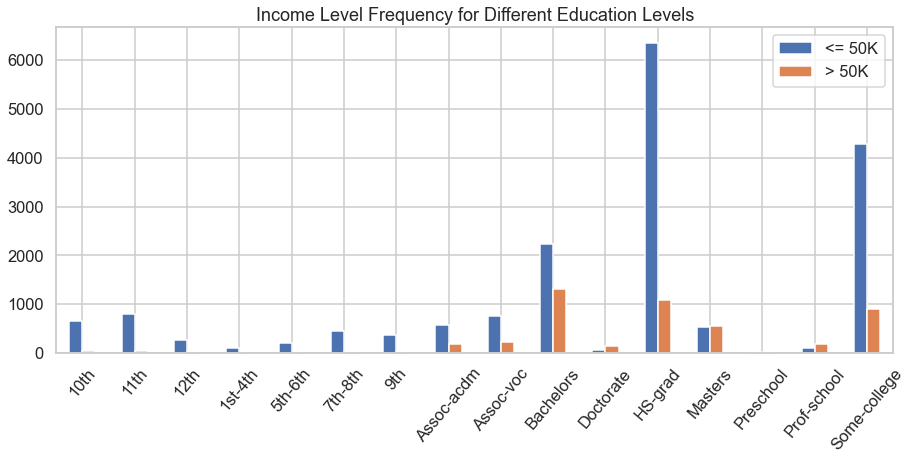

In [35]:
build_graph(data, feature = 'education', title_add = "for Different Education Levels", rotation_degree = 50)

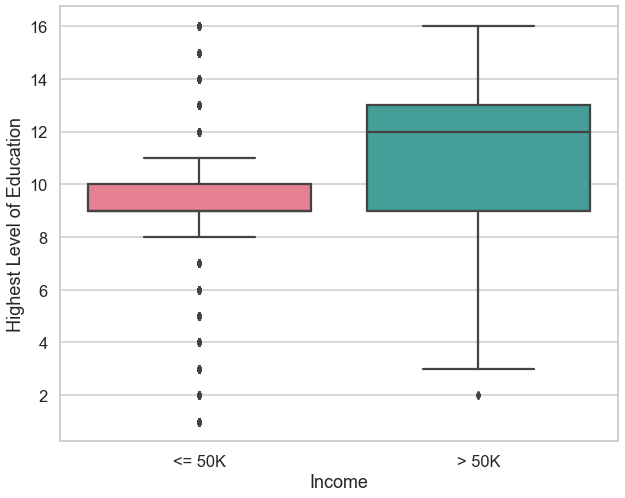

In [36]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['income'], y  = df['education num'], palette = 'husl')
plt.xticks(ticks = [0,1], labels = ['<= 50K', '> 50K'])
plt.xlabel('Income')
plt.ylabel("Highest Level of Education")
plt.show()

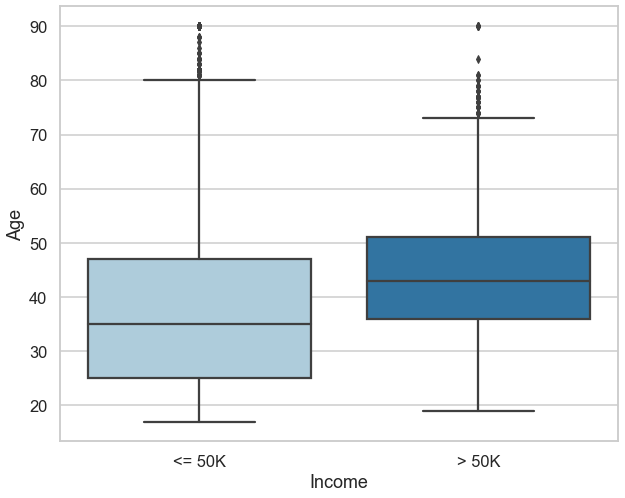

In [37]:
plt.figure(figsize = (10,8))
sns.boxplot(x = df['income'], y  = df['age'], palette = 'Paired')
plt.xticks(ticks = [0,1], labels = ['<= 50K', '> 50K'])
plt.xlabel('Income')
plt.ylabel("Age")
plt.show()

## Data-Preprocessing

### Cleanse data

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22864 entries, 24653 to 4795
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22625 non-null  float64
 1   workclass       21219 non-null  object 
 2   fnlwgt          22642 non-null  float64
 3   education       22627 non-null  object 
 4   education num   22643 non-null  float64
 5   marital         22651 non-null  object 
 6   occupation      21219 non-null  object 
 7   relationship    22654 non-null  object 
 8   race            22641 non-null  object 
 9   sex             22675 non-null  object 
 10  capital gain    22864 non-null  float64
 11  capital loss    22864 non-null  float64
 12  hours per week  22651 non-null  float64
 13  country         22238 non-null  object 
 14  income          22864 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 2.7+ MB


In [39]:
# Since variables "education" and "education num" represent similar things
# we can drop one of them (we choose to drop categorical variable "education")
data = data.drop('education', axis = 1)
test_set = test_set.drop('education', axis = 1)
cat_features.remove('education')

In [40]:
for col in cat_features:
    data[col].replace(np.nan, data[col].mode()[0], inplace = True)
    test_set[col].replace(np.nan, test_set[col].mode()[0], inplace = True)
    
for col in num_features:
    data[col].replace(np.nan, data[col].median(), inplace = True)
    test_set[col].replace(np.nan, test_set[col].median(), inplace = True)

In [41]:
data.head()

,age,workclass,fnlwgt,education num,marital,occupation,relationship,race,sex,capital gain,capital loss,hours per week,country,income
24653,30.0,Private,541343.0,6.0,Married-civ-spouse,Other-service,Husband,Black,Male,0.0,0.0,40.0,United-States,0
4316,29.0,Local-gov,115585.0,10.0,Never-married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,50.0,United-States,0
13855,21.0,Private,306114.0,9.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,35.0,United-States,0
19373,35.0,Private,82622.0,9.0,Divorced,Exec-managerial,Not-in-family,White,Male,0.0,0.0,50.0,United-States,0
8719,38.0,Private,225707.0,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,Cuba,1


In [42]:
X_train = data.drop('income', axis = 1)
y_train = data['income']

X_test = test_set.drop('income', axis = 1)
y_test = test_set['income']

In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22864 entries, 24653 to 4795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22864 non-null  float64
 1   workclass       22864 non-null  object 
 2   fnlwgt          22864 non-null  float64
 3   education num   22864 non-null  float64
 4   marital         22864 non-null  object 
 5   occupation      22864 non-null  object 
 6   relationship    22864 non-null  object 
 7   race            22864 non-null  object 
 8   sex             22864 non-null  object 
 9   capital gain    22864 non-null  float64
 10  capital loss    22864 non-null  float64
 11  hours per week  22864 non-null  float64
 12  country         22864 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.4+ MB


In [44]:
X_train = X_train.drop_duplicates(keep = False)

In [45]:
y_train = y_train[X_train.index]

In [46]:
X_test = X_test.drop_duplicates(keep = False)

In [47]:
y_test = y_test[X_test.index]

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22293 entries, 24653 to 4795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             22293 non-null  float64
 1   workclass       22293 non-null  object 
 2   fnlwgt          22293 non-null  float64
 3   education num   22293 non-null  float64
 4   marital         22293 non-null  object 
 5   occupation      22293 non-null  object 
 6   relationship    22293 non-null  object 
 7   race            22293 non-null  object 
 8   sex             22293 non-null  object 
 9   capital gain    22293 non-null  float64
 10  capital loss    22293 non-null  float64
 11  hours per week  22293 non-null  float64
 12  country         22293 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.4+ MB


### Encode categorical variables

In [49]:
ohe = OneHotEncoder(sparse = False)

# Fit the encoders
ohe.fit(X_train[cat_features].values)

# Transform the data into X_train_nom
X_train_cat = ohe.transform(X_train[cat_features].values)

# transform test set
X_test_cat = ohe.transform(X_test[cat_features].values)

In [50]:
X_train_cat = pd.DataFrame(X_train_cat, columns = np.concatenate(ohe.categories_, axis=0))
X_train_cat.shape

(22293, 82)

In [51]:
X_test_cat = pd.DataFrame(X_test_cat, columns = np.concatenate(ohe.categories_, axis=0))

In [52]:
X_train_cat.head()

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Divorced,Married-AF-spouse,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Numerical Feature Scaling

In [53]:
scalar = StandardScaler()
scalar.fit(X_train[num_features].values)
X_train_num = scalar.transform(X_train[num_features].values)
X_test_num = scalar.transform(X_test[num_features].values)

In [54]:
X_train_num = pd.DataFrame(X_train_num, columns = num_features)
X_test_num = pd.DataFrame(X_test_num, columns = num_features)

In [55]:
X_train_num.shape

(22293, 6)

In [56]:
X_train_num.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week
0,-0.599511,3.363360,-1.599279,-0.232874,-0.032629,-0.005755
1,-0.673851,-0.711596,0.002893,-0.232874,-0.032629,0.817183
2,-1.268571,1.111969,-0.397650,-0.232874,-0.032629,-0.417224
3,-0.227812,-1.027086,-0.397650,-0.232874,-0.032629,0.817183
4,-0.004792,0.342389,-0.397650,-0.232874,-0.032629,-0.005755


In [57]:
# Concatenate back all the data into one single data frame X_train
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)
X_train.shape

(22293, 88)

In [58]:
X_train.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,-0.599511,3.363360,-1.599279,-0.232874,-0.032629,-0.005755,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.673851,-0.711596,0.002893,-0.232874,-0.032629,0.817183,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-1.268571,1.111969,-0.397650,-0.232874,-0.032629,-0.417224,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.227812,-1.027086,-0.397650,-0.232874,-0.032629,0.817183,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.004792,0.342389,-0.397650,-0.232874,-0.032629,-0.005755,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_test.head()

,age,fnlwgt,education num,capital gain,capital loss,hours per week,Federal-gov,Local-gov,Never-worked,Private,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,-1.194231,-0.177205,0.403436,-0.232874,-0.032629,-0.005755,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.673851,2.202496,-0.397650,-0.232874,-0.032629,-0.005755,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.896871,0.954870,0.002893,-0.232874,-0.032629,-1.240162,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.961627,-0.224658,2.406150,-0.232874,-0.032629,-0.005755,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.673851,-0.122650,0.403436,1.146540,-0.032629,0.405714,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Model Training anf Evaluation

We are going to use the following four classification algorithms for our dataset:
* KNN
* Logistic Regression
* Random Forest

In [60]:
models = {'KNN': KNeighborsClassifier(),'LR': LogisticRegression(max_iter = 1000), 'RF': RandomForestClassifier()}

**To optimize some important hyperparameters of the above models, we we will use RandomizedSearchCV.**

In [61]:
hyper_param_KNN = {'n_neighbors': np.arange(5,50), 'weights': ['uniform','distance']}

hyper_param_LR = {'C': [0.001, 0.1, 1, 10, 100], 'class_weight': [None, 'balanced']}

hyper_param_RF = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
            'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
           'min_samples_split': [2, 5, 10],
           'min_samples_leaf': [1, 2, 4]}

models_hyp = {"KNN": hyper_param_KNN, 'LR': hyper_param_LR, "RF": hyper_param_RF}

In [62]:
def optimize_hyps(models, hyps, X_train, y_train):
    
    output = {}
    
    for model_name, model in models.items():
        
        cross_val = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
        model_hyp = RandomizedSearchCV(model, param_distributions = hyps[model_name], cv = cross_val,
                                       scoring = "f1", n_iter = 50, n_jobs = -1, random_state = 0)
        model_hyp.fit(X_train,y_train)
        output[model_name] = model_hyp.best_params_
    return output

In [63]:
# uncomment the below code to get the optimal hyperparameters
#optimize_hyps(models,models_hyp, X_train,y_train)

In [64]:
np.random.seed(0)
model_LR = LogisticRegression(max_iter = 1000, C = 0.1)
model_KNN = KNeighborsClassifier(weights = 'uniform', n_neighbors = 25)
model_RF = RandomForestClassifier(n_estimators = 1000, min_samples_split = 10, 
                                   min_samples_leaf = 2, max_depth = 50)
model_LR.fit(X_train,y_train)
model_KNN.fit(X_train,y_train)
model_RF.fit(X_train,y_train);

In [65]:
final_models = {"Logistic Regression": model_LR, "K-Nearest Neighbors" : model_KNN, "Random Forest" : model_RF}

In [66]:
def internal_evaluation(models, X_train, y_train):
    output = {}
    cross_val = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 0)
    for model_name, model in models.items():
        scores = cross_val_score(model, X_train, y_train, scoring = 'f1', cv = cross_val, n_jobs = -1)
        output[model_name] = scores
    return output

In [67]:
np.random.seed(0)
f1_scores = internal_evaluation(final_models, X_train, y_train)

In [68]:
arr = []
for model_name, f1_score in f1_scores.items():
    arr.append(f1_scores[model_name])
    print(f"{model_name} F1 average: {round(f1_score.mean(),3)}")
    print(f"{model_name} F1 std: {round(f1_score.std(),3)}\n")

Logistic Regression F1 average: 0.602
Logistic Regression F1 std: 0.022

K-Nearest Neighbors F1 average: 0.616
K-Nearest Neighbors F1 std: 0.021

Random Forest F1 average: 0.615
Random Forest F1 std: 0.026



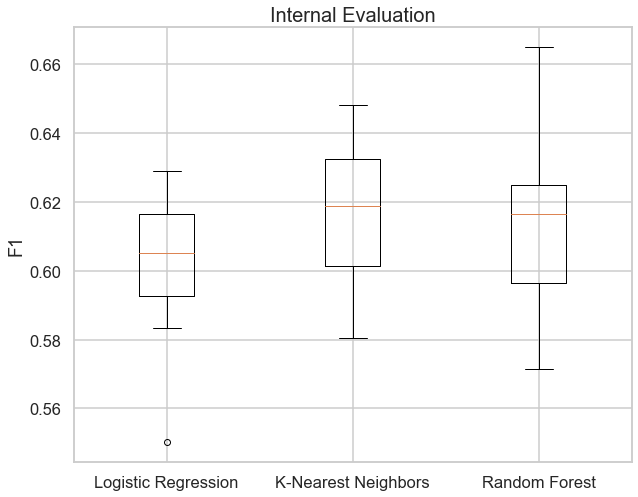

In [69]:
plt.figure(figsize = (10,8))
plt.boxplot(arr, labels = list(f1_scores.keys()))
plt.ylabel('F1')
plt.title("Internal Evaluation", fontsize = 20)
plt.show()

**Feature importance (RF)**

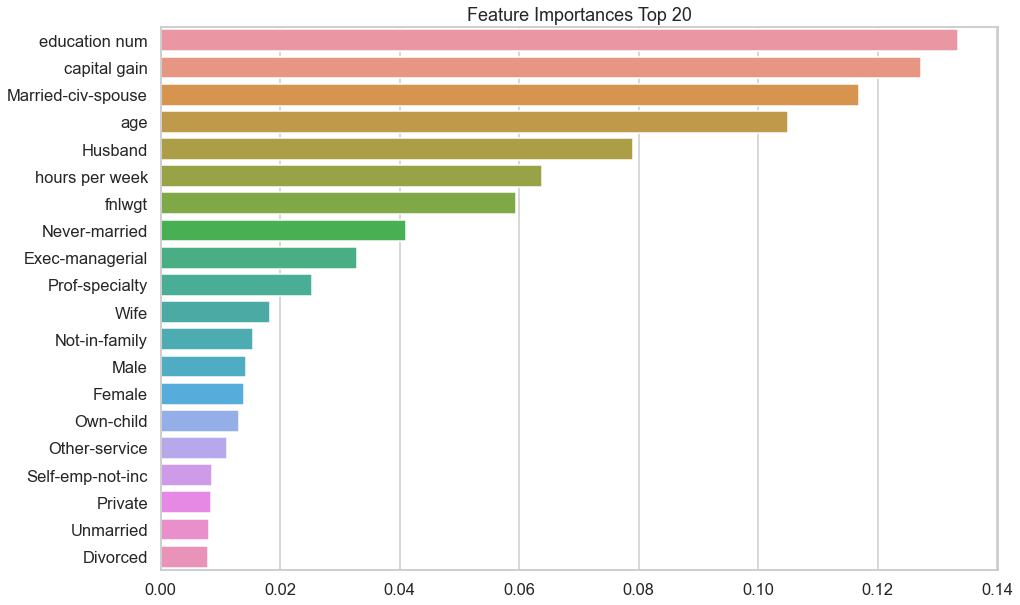

In [70]:
feature_importance = pd.Series(model_RF.feature_importances_, index = X_train.columns).sort_values(ascending=False)[0:20]
plt.figure(figsize = (15,10))
sns.barplot(x = feature_importance, y = feature_importance.index)
plt.title("Feature Importances Top 20")
plt.show()

In [71]:
def model_metrics(final_models, X_test, y_test):
    
    results = pd.DataFrame(columns = ["Model","Metric","Value (%)"])
    
    for model_name, model in final_models.items():
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:,1]
        result = pd.DataFrame({"Value (%)":[
            accuracy_score(y_test,y_pred) * 100, precision_score(y_test,y_pred) * 100,
            recall_score(y_test,y_pred) * 100, roc_auc_score(y_test,y_prob) * 100],
            "Metric":["Accuracy", "Precision", "Recall", "AUC"],
            "Model":[model_name] * 4})
        results = results.append(result,ignore_index=True)
    return results

In [72]:
results = model_metrics(final_models, X_test, y_test)
results

,Model,Metric,Value (%)
0,Logistic Regression,Accuracy,84.791332
1,Logistic Regression,Precision,67.977970
2,Logistic Regression,Recall,54.203262
3,Logistic Regression,AUC,89.487312
4,K-Nearest Neighbors,Accuracy,85.286249
5,K-Nearest Neighbors,Precision,68.188513
6,K-Nearest Neighbors,Recall,58.092848
7,K-Nearest Neighbors,AUC,89.405431
8,Random Forest,Accuracy,86.035313
9,Random Forest,Precision,73.226351


C:\Users\Sky\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


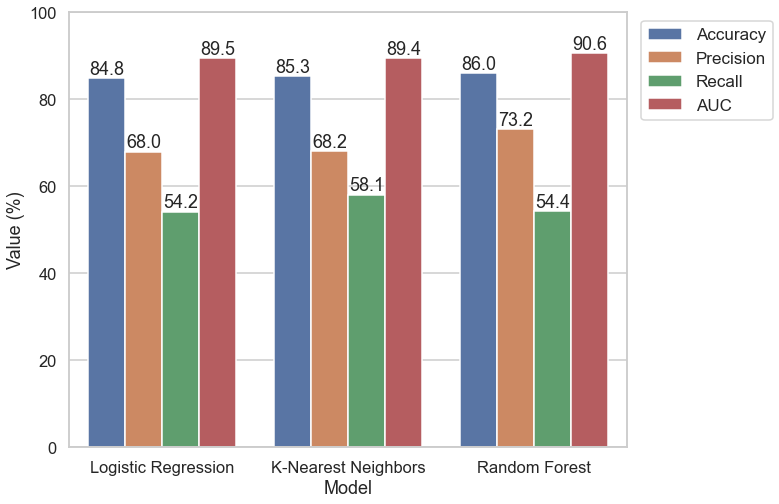

In [73]:
plt.figure(figsize = (10,8))
plot = sns.barplot(results["Model"], results["Value (%)"],hue = results["Metric"])
plt.legend(bbox_to_anchor=(1.01, 1), loc = 2,fontsize = 17)
plt.ylim([0,100]);
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [74]:
def build_roc_curve(final_models, X_test, y_test):
    
    results = pd.DataFrame(columns = ['Model', 'FPR','TPR'])
    for model_name, model in final_models.items():
        y_prob = model.predict_proba(X_test)[::,1]
        FPR, TPR, _ = roc_curve(y_test, y_prob)
        results = results.append({'Model':model_name,
                                        'FPR':FPR, 
                                        'TPR':TPR}, ignore_index=True)
    
    results.set_index("Model",inplace=True)
    fig = plt.figure(figsize=(10,8))
    
    for i in results.index:
        plt.plot(results.loc[i]['FPR'], 
             results.loc[i]['TPR'], 
             linewidth=3,
             label="{}".format(i))
    plt.plot([0,1], [0,1], color='orange', linestyle='--')
    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)
    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)
    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=20)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.show()

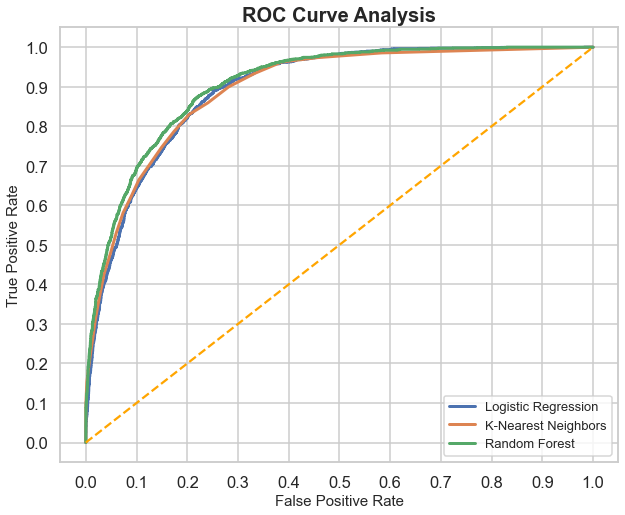

In [75]:
build_roc_curve(final_models,X_test,y_test)